In [78]:
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
from matplotlib.colors import ListedColormap
import sklearn.neighbors
import sklearn.cross_validation
import sklearn.metrics

n=100

def make_class_data(mean=[50,110],multiplier=1.5,var=[[10,10],[10,10]],cor=-0.4,N=100):
    """
    generate a synthetic classification data set with two variables
    """
    cor=numpy.array([[1.,cor],[cor,1.]])
    var1=numpy.array([[var[0][0],0],[0,var[0][1]]])
    cov1=var1.dot(cor).dot(var1)
    d1=numpy.random.multivariate_normal(mean,cov1,N/2)
    var2=numpy.array([[var[1][0],0],[0,var[1][1]]])
    cov2=var2.dot(cor).dot(var2)
    d2=numpy.random.multivariate_normal(numpy.array(mean)*multiplier,cov2,N/2)
    d=numpy.vstack((d1,d2))
    cl=numpy.zeros(N)
    cl[:(N/2)]=1
    return cl,d

[  51.80430301  109.96663803]
[  52.74232234  122.49231445]


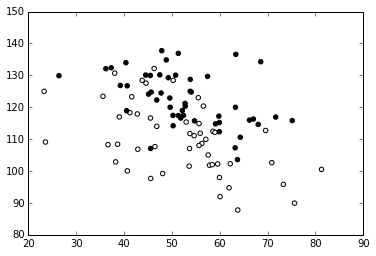

In [64]:
cl,d=make_class_data(multiplier=[1.1,1.1],N=n)
print numpy.mean(d[:50,:],0)
print numpy.mean(d[50:,:],0)

plt.scatter(d[:,0],d[:,1],c=cl,cmap=matplotlib.cm.hot)

Now let's look at some classification methods. 

####Nearest Neighbor

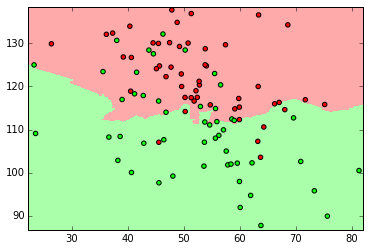

In [75]:
# adapted from http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#example-neighbors-plot-classification-py

n_neighbors = 30

 # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(d, cl)

def plot_cls_with_decision_surface(d,cl,clf,h = .25 ):
    """Plot the decision boundary. For that, we will assign a color to each
    point in the mesh [x_min, m_max]x[y_min, y_max].
    h= step size in the grid
    """
    x_min, x_max = d[:, 0].min() - 1, d[:, 0].max() + 1
    y_min, y_max = d[:, 1].min() - 1, d[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                         numpy.arange(y_min, y_max, h))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(d[:, 0], d[:, 1], c=cl, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plot_cls_with_decision_surface(d,cl,clf)

Exercise: Change the number of nearest neighbors and see how it changes the surface.

Now let's write a function to perform cross-validation and compute prediction accuracy.


In [84]:

def classify(d,cl,clf,cv):
    pred=numpy.zeros(n)
    for train,test in cv:
        clf.fit(d[train,:],cl[train])
        pred[test]=clf.predict(d[test,:])
    return sklearn.metrics.accuracy_score(cl,pred),sklearn.metrics.confusion_matrix(cl,pred)



In [86]:
clf=sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
cv=sklearn.cross_validation.LeaveOneOut(n)
acc,confusion=classify(d,cl,clf,cv)

In [87]:
print acc
print confusion

0.71
[[42  8]
 [21 29]]


Exercise:  Loop through different levels of n_neighbors (from 1 to 30) and compute the accuracy.

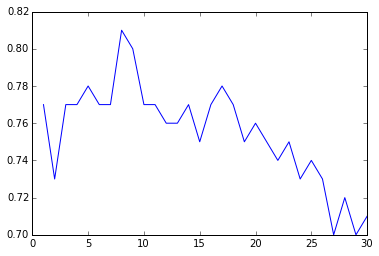

In [88]:
accuracy_knn=numpy.zeros(30)
for i in range(1,31):
    clf=sklearn.neighbors.KNeighborsClassifier(i, weights='uniform')
    accuracy_knn[i-1],_=classify(d,cl,clf,cv)
plt.plot(range(1,31),accuracy_knn)

Now write a loop that does this using 100 different randomly generated datasets, and plot the mean across datasets.  This will take a couple of minutes to run.

In [ ]:
accuracy_knn=numpy.zeros((100,30))
for x in range(100):
    ds_cl,ds_x=make_class_data(multiplier=[1.1,1.1],N=n)
    for i in range(1,31):
        clf=sklearn.neighbors.KNeighborsClassifier(i, weights='uniform')
        accuracy_knn[x,i-1],_=classify(ds_x,ds_cl,clf,cv)
plt.plot(range(1,31),numpy.mean(accuracy_knn,0))

IndexError: too many indices for array

In [94]:
ds_cl

array([[  55.07722158,  103.89268211],
       [  54.85414367,   87.51289754],
       [  41.58255946,  115.2451056 ],
       [  44.36139544,  110.55681338],
       [  37.51832285,  109.39032445],
       [  59.25602652,  106.61548357],
       [  64.35626641,  111.1496849 ],
       [  48.56535041,  116.05636422],
       [  38.76144731,  103.19556982],
       [  57.70352054,  118.67213291],
       [  65.85815792,   89.06650388],
       [  39.6537792 ,   94.26611314],
       [  62.53973655,  114.4868213 ],
       [  45.82950902,  113.31033232],
       [  48.09943375,  102.25101541],
       [  55.90256422,   99.36848287],
       [  38.77879713,  117.616597  ],
       [  30.36964764,  130.57473504],
       [  57.60978622,  106.77214607],
       [  72.25840139,  116.66338707],
       [  36.89038722,  106.88848127],
       [  39.29082647,  120.52314093],
       [  57.49297913,   94.38713893],
       [  58.03445562,  112.07897559],
       [  44.06947415,  107.12343739],
       [  43.30954703,  1